In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


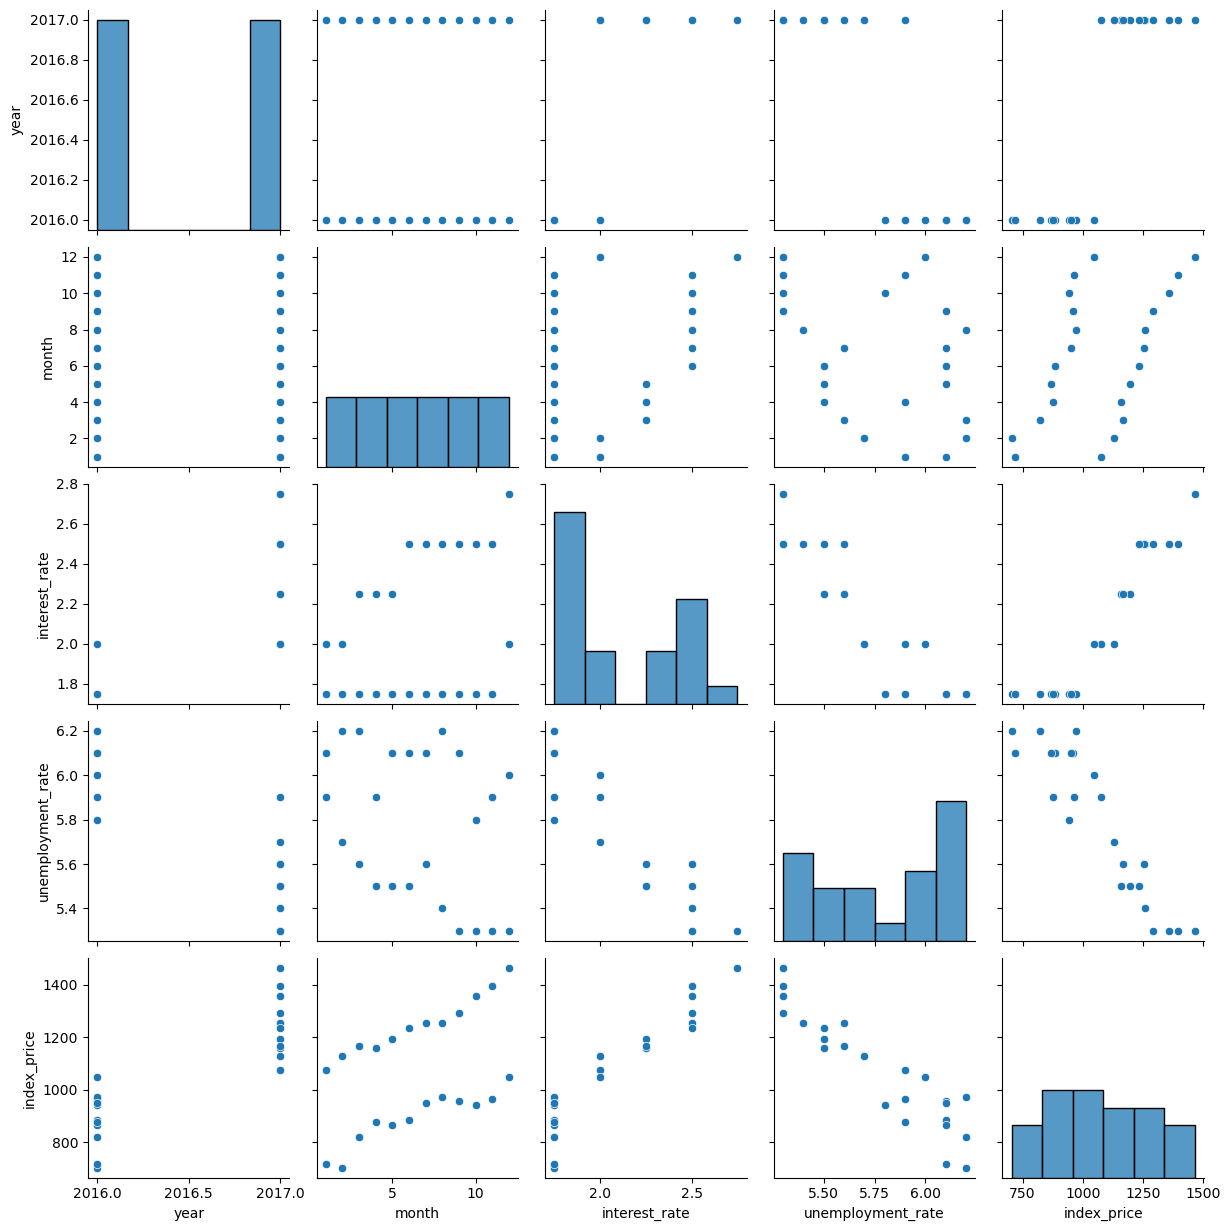

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
df.corr()

,year,month,interest_rate,unemployment_rate,index_price
year,1.000000e+00,7.887056e-14,0.882851,-0.877000,0.863232
month,7.887056e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


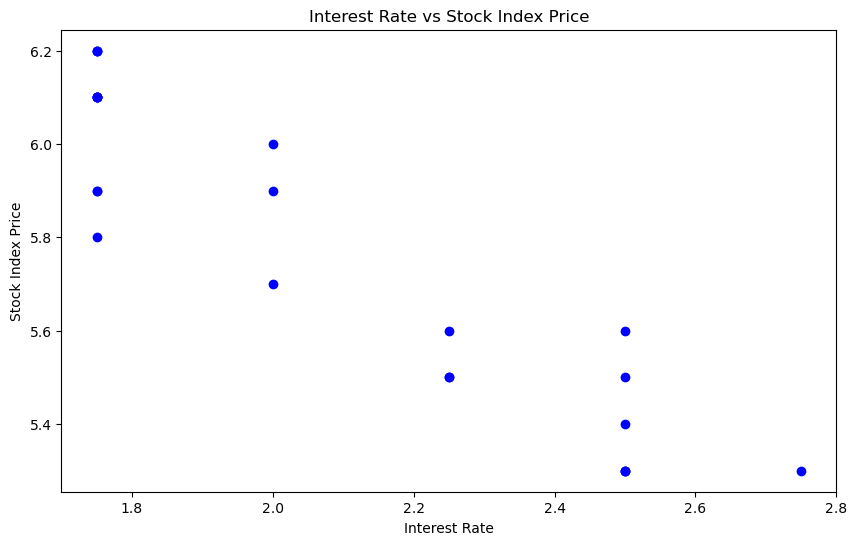

In [9]:
# Visuualize the data points more clearly
plt.figure(figsize=(10,6))
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='blue')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Interest Rate vs Stock Index Price')
plt.show()

In [11]:
# dependent and independent variables
# use existing columns: 'interest_rate', 'unemployment_rate', 'index_price'
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [ ]:
|